In [1]:
import sys
import pyccl as ccl
import pickle
import camb
from astropy.cosmology import Planck15 as cosmo
import skylens
from skylens import *

In [2]:
from skylens.cosmology import *

In [3]:
cosmo=cosmo.clone(m_nu=cosmo.m_nu*0)

In [4]:
cosmo_fid=dict({'h':cosmo.h,'Omb':cosmo.Ob0,'Omd':cosmo.Om0-cosmo.Ob0,'s8':0.817,'Om':cosmo.Om0,'OmR':cosmo.Ogamma0+cosmo.Onu0,
                'Ase9':2.2,'mnu':0,'Omk':cosmo.Ok0,'tau':0.06,'ns':0.965,'w':-1,'wa':0,'Tcmb':cosmo.Tcmb0})

In [5]:
z2=np.logspace(-3,np.log10(1),100)
z=np.linspace(0,4,801)
# z=(z[1:]+z[:-1])*.5
z=np.unique(np.sort(np.append(z,z2)))

In [6]:
cosmo_fid['OmR']

9.117387923885006e-05

In [13]:
%time cosmo_new=cosmology(cosmo_params=cosmo_fid,h_inv=False,dz=0.005,z=z,use_astropy=False)#,astropy_cosmo=cosmo)
# cosmo_new2=cosmology(cosmo_params=cosmo_fid,h_inv=False,dz=0.005,z=z,use_astropy=False)

CPU times: user 1.58 ms, sys: 515 µs, total: 2.1 ms
Wall time: 1.27 ms


In [14]:
get_size_pickle(cosmo_new)

0.028

In [15]:
dict_size_pickle(cosmo_new.__dict__,)

 dict full size  0.028
 dict obj size:  self 0.028
 cosmo_params dict full size  0.001
 cosmo_params dict obj size:  h 0.0
 cosmo_params dict obj size:  Omb 0.0
 cosmo_params dict obj size:  Omd 0.0
 cosmo_params dict obj size:  s8 0.0
 cosmo_params dict obj size:  Om 0.0
 cosmo_params dict obj size:  OmR 0.0
 cosmo_params dict obj size:  Ase9 0.0
 cosmo_params dict obj size:  mnu 0.0
 cosmo_params dict obj size:  Omk 0.0
 cosmo_params dict obj size:  tau 0.0
 cosmo_params dict obj size:  ns 0.0
 cosmo_params dict obj size:  w 0.0
 cosmo_params dict obj size:  wa 0.0
 cosmo_params dict obj size:  Tcmb 0.0
 dict obj size:  dz 0.0
 dict obj size:  z 0.007
 dict obj size:  z_max 0.0
 dict obj size:  do_calcs 0.0
 dict obj size:  rtol 0.0
 dict obj size:  h_inv 0.0
 dict obj size:  use_astropy 0.0
 dict obj size:  astropy_cosmo 0.0
 kwargs dict full size  0.0
 dict obj size:  c 0.0
 dict obj size:  _z 0.007
 dict obj size:  _dz 0.007
 dict obj size:  comoving_distance 0.028
 dict obj size:

In [16]:
get_size_pickle(cosmo)

0.003

In [17]:
nk=1000
k=np.logspace(-4,1.5,nk)
nz=200
# z=np.logspace(-3,0,nz)

CPU times: user 18.7 ms, sys: 946 µs, total: 19.7 ms
Wall time: 18.7 ms
CPU times: user 261 ms, sys: 2.6 ms, total: 263 ms
Wall time: 263 ms
CPU times: user 38 µs, sys: 12 µs, total: 50 µs
Wall time: 53.9 µs
CPU times: user 86 µs, sys: 0 ns, total: 86 µs
Wall time: 120 µs


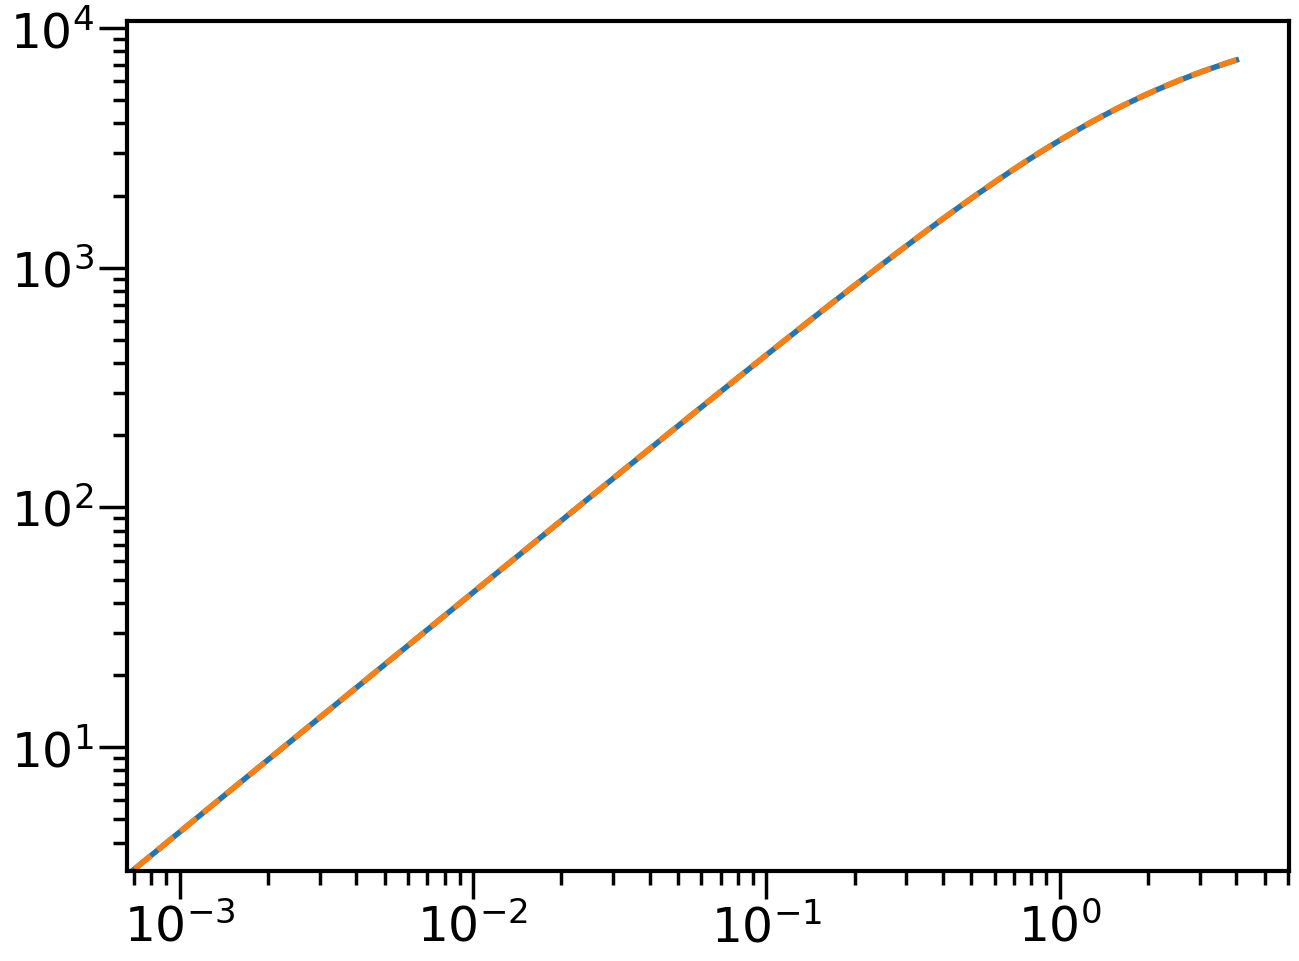

<ipython-input-19-91ab3ed64131>:9: RuntimeWarning: invalid value encountered in true_divide
  plot(z,dc1/dc2)


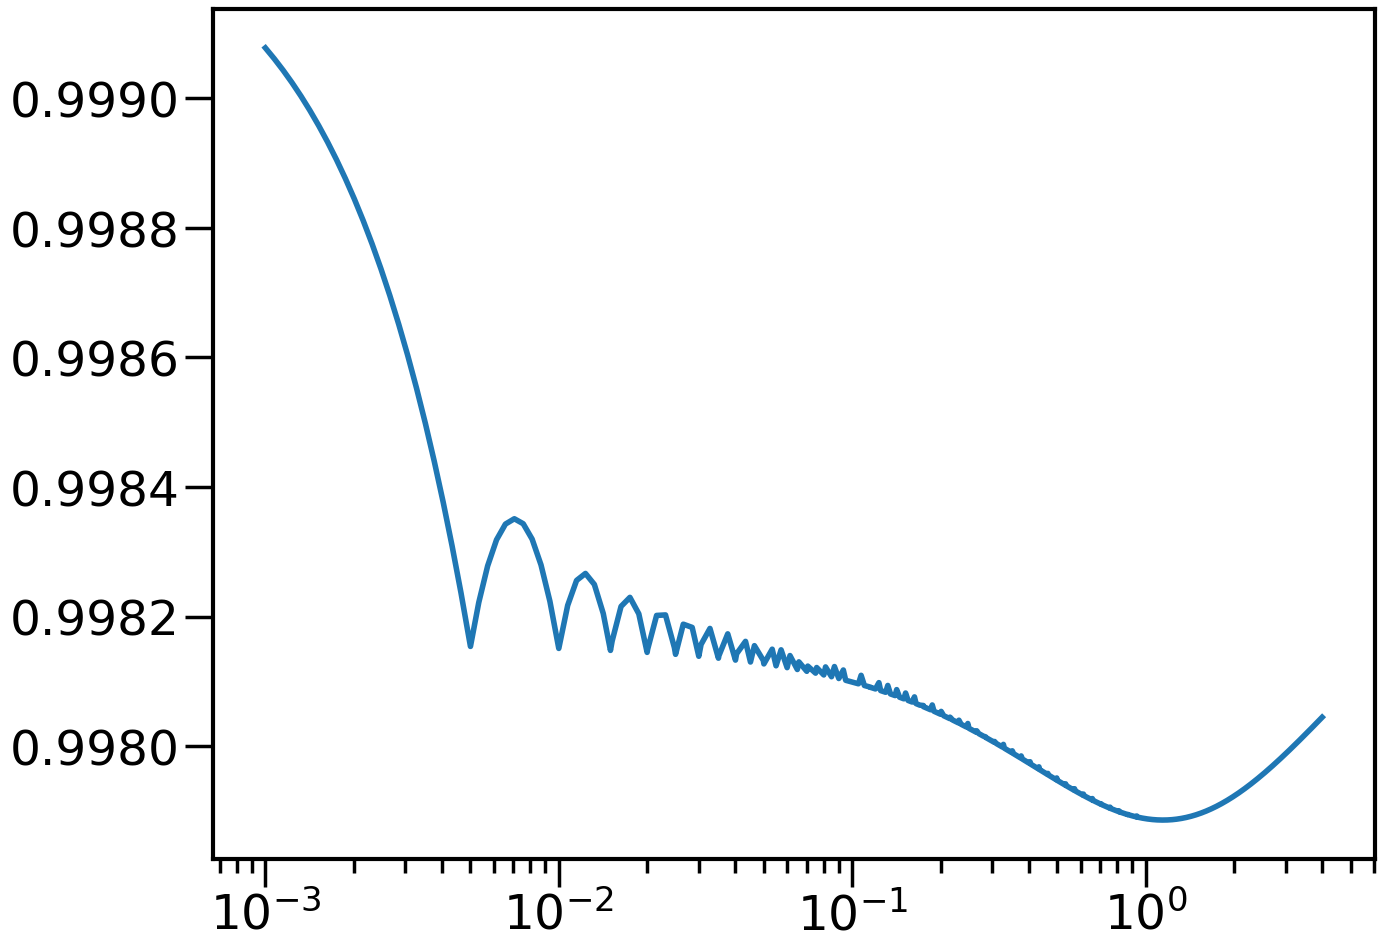

<ipython-input-19-91ab3ed64131>:12: RuntimeWarning: invalid value encountered in true_divide
  plot(z,dc2_1/dc2)


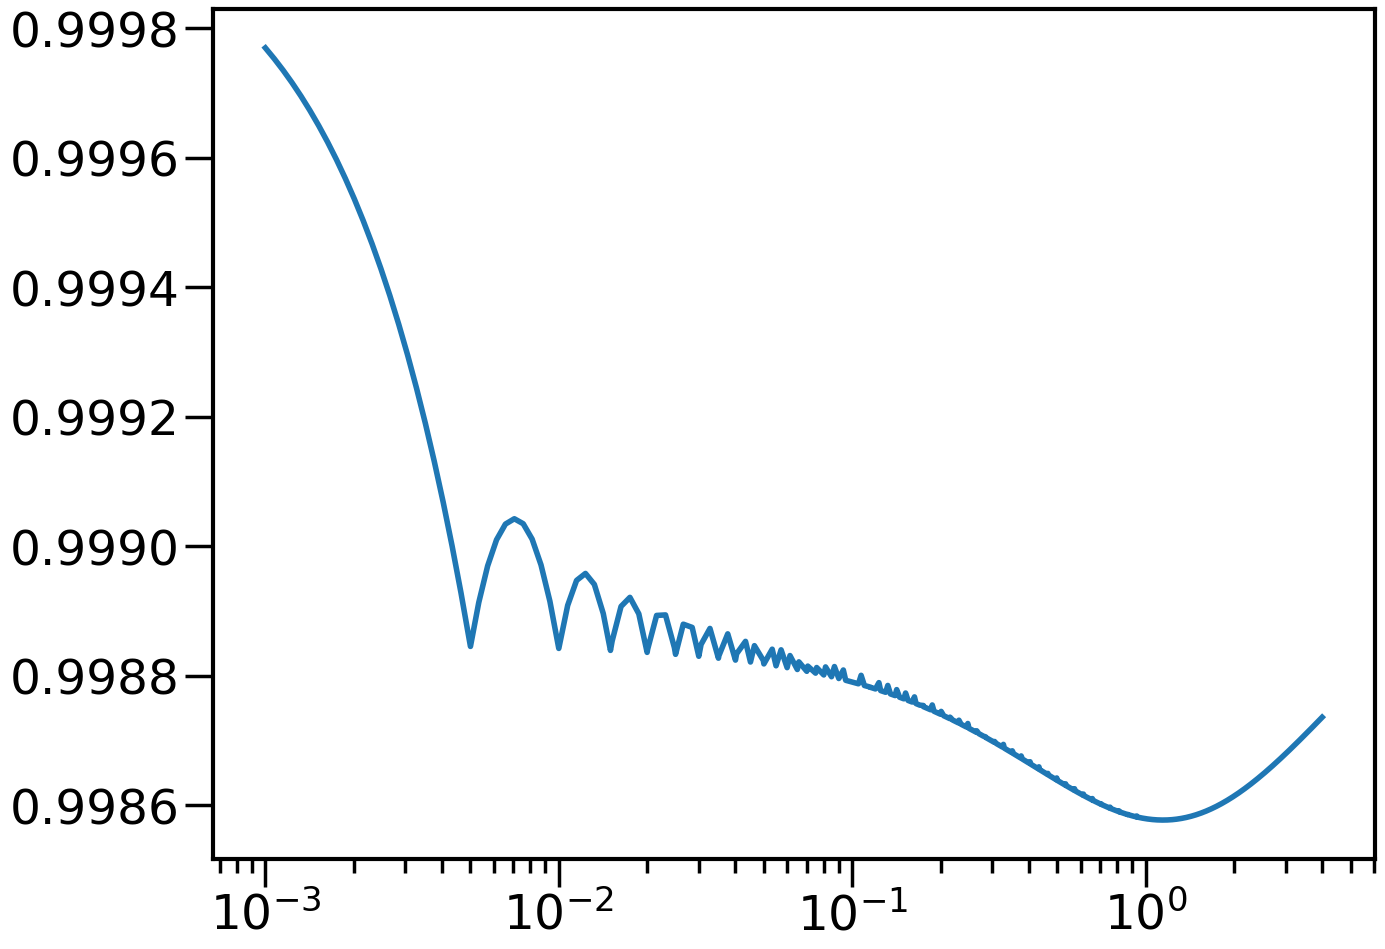

In [19]:
%time dc1=cosmo.comoving_transverse_distance(z=z).value#astropy
%time dc2_1=cosmo_new.comoving_distance_int(z=z)#skylens, scipy integrals
%time dc2_2=cosmo_new.comoving_distance_trapz(z=z)#skylens, scipy integrals
%time dc2=cosmo_new.comoving_distance(z=z)#.value#skylens, trapz
plot(z,dc1)
plot(z,dc2,'--')
loglog()
show()
plot(z,dc1/dc2)
xscale('log')
show()
plot(z,dc2_1/dc2)
xscale('log')

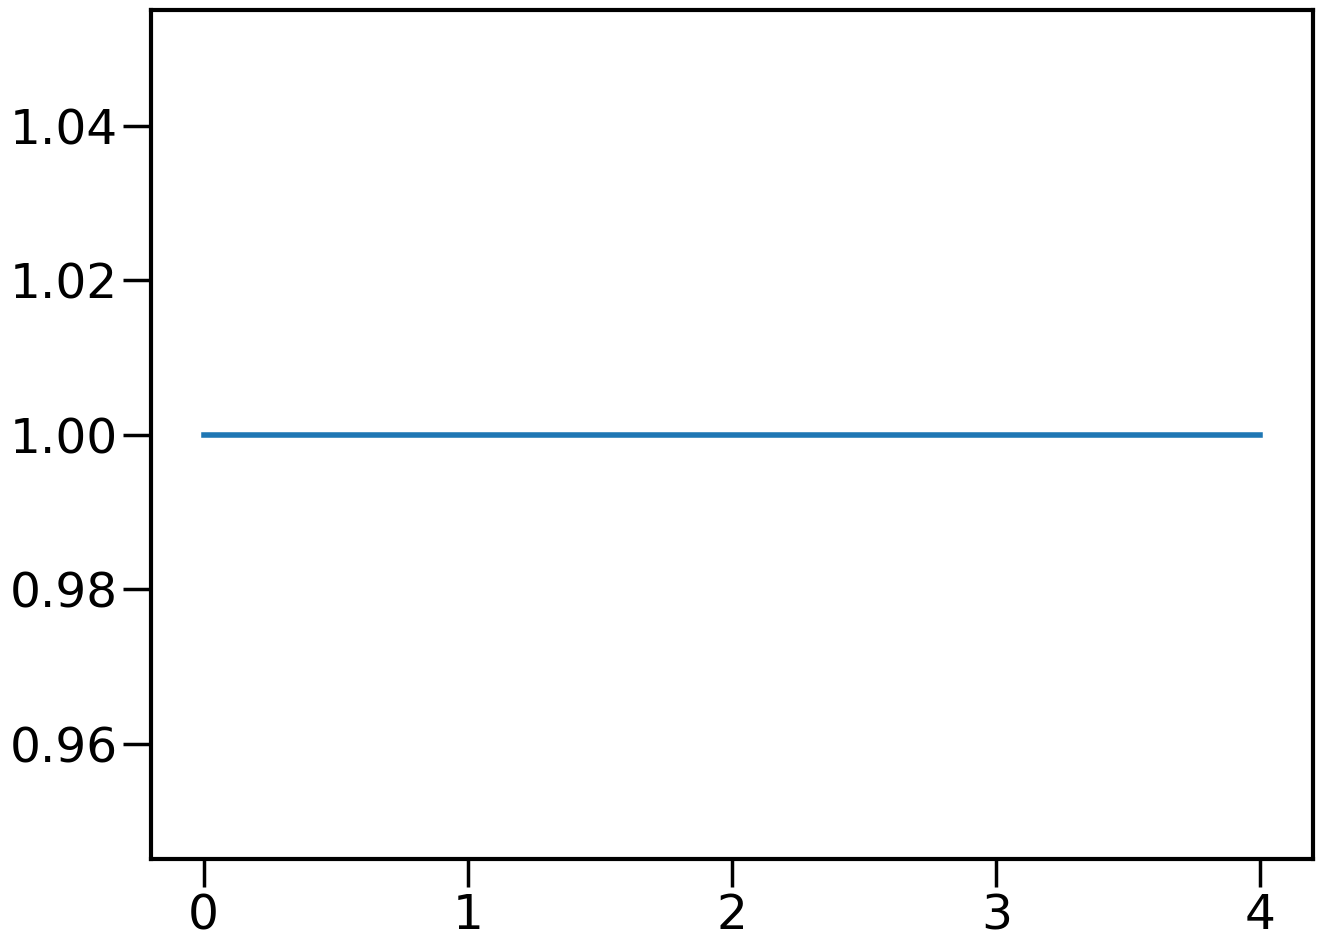

In [26]:
plot(z,cosmo.inv_efunc(z)/cosmo_new.E_z_inv(z))
# plot()

In [30]:
dc1-dc2

array([ 0.00000000e+00, -4.08507758e-03, -4.45945052e-03, -4.87273527e-03,
       -5.32952016e-03, -5.83499132e-03, -6.39501568e-03, -7.01623611e-03,
       -7.70618025e-03, -8.47338509e-03, -9.32753971e-03, -1.02796488e-02,
       -1.13422199e-02, -1.25294783e-02, -1.38576131e-02, -1.53450596e-02,
       -1.70128230e-02, -1.88848500e-02, -2.09884545e-02, -2.33548071e-02,
       -2.60194962e-02, -2.90231723e-02, -3.24122876e-02, -3.62399458e-02,
       -4.05668771e-02, -4.08716944e-02, -4.20170052e-02, -4.36142773e-02,
       -4.56656207e-02, -4.82546596e-02, -5.14786930e-02, -5.54508303e-02,
       -6.03024552e-02, -6.61860665e-02, -7.32785533e-02, -8.17849715e-02,
       -8.45253832e-02, -8.86563737e-02, -9.44576419e-02, -1.02256077e-01,
       -1.12433240e-01, -1.22737741e-01, -1.23384378e-01, -1.28420111e-01,
       -1.36583451e-01, -1.48516395e-01, -1.63727918e-01, -1.64016979e-01,
       -1.70880000e-01, -1.83082624e-01, -2.01740783e-01, -2.04753421e-01,
       -2.12004327e-01, -

In [ ]:
ns1=1-.96
cosmo_new.Om**(-0.785-.05*np.log(cosmo_new.Om))*np.exp(-.95*ns1-0.169*ns1**2)

In [ ]:
pyccl_pkf=pyccl.linear_matter_power
# if pk_params['non_linear']==1:
#     pyccl_pkf=pyccl.nonlin_matter_power

In [ ]:
cosmo_params_ccl1={'Omega_c':cosmo_fid['Omd'],
                  'Omega_b':cosmo_fid['Omb'],
                  'h':cosmo_fid['h'],
#                   'sigma8':0.81,
                  'A_s':cosmo_fid['Ase9']*1.e-9,
                  'n_s': cosmo_fid['ns'],
                  'm_nu':cosmo_fid['mnu'],
                 'transfer_function':'boltzmann_camb', 'matter_power_spectrum':'linear'}
cosmo_ccl1 = ccl.Cosmology(**cosmo_params_ccl1)

cosmo_params_ccl2={'Omega_c':cosmo_fid['Omd'],
                  'Omega_b':cosmo_fid['Omb'],
                  'h':cosmo_fid['h'],
                  'sigma8':ccl.sigma8(cosmo_ccl1),
#                   'A_s':cosmo_fid['Ase9']*1.e-9,
                  'n_s': cosmo_fid['ns'],
                  'm_nu':cosmo_fid['mnu'],
                 'transfer_function':'eisenstein_hu', 'matter_power_spectrum':'linear'} #eisenstein_hu
cosmo_ccl2 = ccl.Cosmology(**cosmo_params_ccl2)

In [ ]:
ccl.sigma8(cosmo_ccl2)

In [ ]:
ps1=np.zeros((nz,nk))
for i in np.arange(nz):
    ps1[i]= pyccl_pkf(cosmo_ccl1,k,1./(1+z[i]))

In [ ]:
ps2=np.zeros((nz,nk))
for i in np.arange(nz):
    ps2[i]= pyccl_pkf(cosmo_ccl2,k,1./(1+z[i]))

In [ ]:
pke=pk_eu(k=k,cosmo_params=cosmo_fid)

In [ ]:
pke.eh_pk()

In [ ]:
i=0
ns=cosmo_fid['ns']
plot(k,k**3*ps2[0])
plot(k,k**3*pke.pk,'--')
loglog()

In [ ]:
i=0
ns=cosmo_fid['ns']
plot(k,ps2[0]/pke.pk)
loglog()

In [ ]:
#https://nbodykit.readthedocs.io/en/latest/_modules/nbodykit/cosmology/power/transfers.html#EisensteinHu
class EisensteinHu(object):
    def __init__(self, cosmo, redshift):
        self.cosmo = cosmo
        self.redshift = redshift

        self.Obh2 = cosmo.Omb * cosmo.h ** 2
        self.Omh2 = cosmo.Om * cosmo.h ** 2
        self.f_baryon = cosmo.Omb / cosmo.Om
        self.theta_cmb = cosmo.Tcmb / 2.7

        # redshift and wavenumber of equality
        self.z_eq = 2.5e4 * self.Omh2 * self.theta_cmb ** (-4) # this is 1 + z
        self.k_eq = 0.0746 * self.Omh2 * self.theta_cmb ** (-2) # units of 1/Mpc

        # sound horizon and k_silk
        self.z_drag_b1 = 0.313 * self.Omh2 ** -0.419 * (1 + 0.607 * self.Omh2 ** 0.674)
        self.z_drag_b2 = 0.238 * self.Omh2 ** 0.223
        self.z_drag    = 1291 * self.Omh2 ** 0.251 / (1. + 0.659 * self.Omh2 ** 0.828) * \
                           (1. + self.z_drag_b1 * self.Obh2 ** self.z_drag_b2)

        self.r_drag = 31.5 * self.Obh2 * self.theta_cmb ** -4 * (1000. / (1+self.z_drag))
        self.r_eq   = 31.5 * self.Obh2 * self.theta_cmb ** -4 * (1000. / self.z_eq)

        self.sound_horizon = 2. / (3.*self.k_eq) * numpy.sqrt(6. / self.r_eq) * \
                    numpy.log((numpy.sqrt(1 + self.r_drag) + numpy.sqrt(self.r_drag + self.r_eq)) / (1 + numpy.sqrt(self.r_eq)) )
        self.k_silk = 1.6 * self.Obh2 ** 0.52 * self.Omh2 ** 0.73 * (1 + (10.4*self.Omh2) ** -0.95)

        # alpha_c
        alpha_c_a1 = (46.9*self.Omh2) ** 0.670 * (1 + (32.1*self.Omh2) ** -0.532)
        alpha_c_a2 = (12.0*self.Omh2) ** 0.424 * (1 + (45.0*self.Omh2) ** -0.582)
        self.alpha_c = alpha_c_a1 ** -self.f_baryon * alpha_c_a2 ** (-self.f_baryon**3)

        # beta_c
        beta_c_b1 = 0.944 / (1 + (458*self.Omh2) ** -0.708)
        beta_c_b2 = 0.395 * self.Omh2 ** -0.0266
        self.beta_c = 1. / (1 + beta_c_b1 * ((1-self.f_baryon) ** beta_c_b2) - 1)

        self.beta_c_b1=beta_c_b1
        self.beta_c_b2=beta_c_b2
        
        y = self.z_eq / (1 + self.z_drag)
        alpha_b_G = y * (-6.*numpy.sqrt(1+y) + (2. + 3.*y) * numpy.log((numpy.sqrt(1+y)+1) / (numpy.sqrt(1+y)-1)))
        self.alpha_b = 2.07 *  self.k_eq * self.sound_horizon * (1+self.r_drag)**-0.75 * alpha_b_G

        self.beta_node = 8.41 * self.Omh2 ** 0.435
        self.beta_b    = 0.5 + self.f_baryon + (3. - 2.*self.f_baryon) * numpy.sqrt( (17.2*self.Omh2) ** 2 + 1 )

    def __call__(self, k):
        if numpy.isscalar(k) and k == 0.:
            return 1.0

        k = numpy.asarray(k)
        # only compute k > 0 modes
        valid = k > 0.

#         k = k[valid] * self.cosmo.h # now in 1/Mpc
        q = k / (13.41*self.k_eq)
        ks = k*self.sound_horizon

        T_c_ln_beta   = numpy.log(numpy.e + 1.8*self.beta_c*q)
        T_c_ln_nobeta = numpy.log(numpy.e + 1.8*q);
        T_c_C_alpha   = 14.2 / self.alpha_c + 386. / (1 + 69.9 * q ** 1.08)
        T_c_C_noalpha = 14.2 + 386. / (1 + 69.9 * q ** 1.08)

        T_c_f = 1. / (1. + (ks/5.4) ** 4)
        self.T_c_f=T_c_f
        f = lambda a, b : a / (a + b*q**2)
        T_c = T_c_f * f(T_c_ln_beta, T_c_C_noalpha) + (1-T_c_f) * f(T_c_ln_beta, T_c_C_alpha)

        s_tilde = self.sound_horizon * (1 + (self.beta_node/ks)**3) ** (-1./3.)
        ks_tilde = k*s_tilde

        T_b_T0 = f(T_c_ln_nobeta, T_c_C_noalpha)
        T_b_1 = T_b_T0 / (1 + (ks/5.2)**2 )
        T_b_2 = self.alpha_b / (1 + (self.beta_b/ks)**3 ) * numpy.exp(-(k/self.k_silk) ** 1.4)
        T_b = numpy.sinc(ks_tilde/numpy.pi) * (T_b_1 + T_b_2)
        self.T_b=T_b
        self.T_c=T_c
        T = numpy.ones(valid.shape)
        T[valid] = self.f_baryon*T_b + (1-self.f_baryon)*T_c;
        return T #* self.cosmo.DZ_approx(np.atleast_1d([0,self.redshift]))

In [ ]:
pke=pk_eu(k=k,cosmo_params=cosmo_fid)
pke.eh_pk()

In [ ]:
eu=EisensteinHu(cosmo=cosmo_new,redshift=0)
_=eu(k)

In [ ]:
eu.r_eq,pke.R_eq

In [ ]:
eu.k_eq/pke.k_eq

In [ ]:
eu.k_silk/pke.k_s

In [ ]:
eu.sound_horizon/pke.sd

In [ ]:
eu.r_drag/pke.Rd

In [ ]:
eu.alpha_c/pke.alpha_c

In [ ]:
eu.beta_c,pke.beta_c

In [ ]:
eu.beta_c_b1,pke.b1

In [ ]:
eu.beta_c_b2,pke.b2

In [ ]:
eu.beta_b,pke.beta_b

In [ ]:
eu.beta_node,pke.beta_n

In [ ]:
np.all(np.isclose(eu.T_c_f,pke.cdm_f))

In [ ]:
eu.T_c_f/pke.cdm_f

In [ ]:
plot(k,eu.T_c)
plot(k,pke.transfer_c)
loglog()

In [ ]:
plot(k,eu.T_b)
plot(k,pke.transfer_b)
loglog()

In [ ]:
plot(k,eu(k))
plot(k,pke.t_total,'--')
loglog()

In [ ]:
plot(k,eu(k)/pke.t_total)
xscale('log')

In [ ]:
Om_S=np.linspace(0.2,0.4,100)
# s8=np.zeros_like(Om_S)

In [ ]:
i=0
for om in Om_S:
    cosmo_params_ccl_i={'Omega_c':om-cosmo_fid['Omb'],
                      'Omega_b':cosmo_fid['Omb'],
                      'h':cosmo_fid['h'],
    #                   'sigma8':0.81,
                      'A_s':cosmo_fid['Ase9']*1.e-9,
                      'n_s': cosmo_fid['ns'],
                      'm_nu':cosmo_fid['mnu'],
                     'transfer_function':'boltzmann_camb', 'matter_power_spectrum':'linear'}
    cosmo_ccl_i = ccl.Cosmology(**cosmo_params_ccl_i)
    s8[i]=ccl.sigma8(cosmo_ccl_i)
    i+=1

In [ ]:
x=50
Om_S/=Om_S[x]
ns1=1-.96
f=Om_S**-.8

In [ ]:
f=Om_S**(-0.785-.05*np.log(Om_S))*np.exp(-.95*ns1-0.169*ns1**2)

In [ ]:

plot(Om_S,s8*f)